## Programming for Data Analysis - Project 2 ##

**Name: James McEneaney** <br/><br/>
**Course: Higher Diploma in Computing in Data Analytics, ATU Ireland** <br/><br/> 
**Semester: Semester 2 2023** <br/><br/>


***

### Introduction ###

### Data-cleansing ###

To begin, I will download the libraries I will use in this project. I will use pandas to create the dataframes which I will use to analyse the historical climate data:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss 

I have downloaded multiple climate related datasets online. These datasets were as follows:

- Atmospheric carbon dioxide concentrations from a 2008 paper in Nature by Luthi et al.

- Atmospheric carbon dioxide concentratons from report by the Intergovernmental Panel on Climate Change (IPCC)

- Temperature estimates going back 820,000 years before the year 1950, as well as up until 2005, based on the EPICA Dome C Ice Core Deuterium Data. EPICA stands for European Project for Ice Coring in Antarctica.

- Temperature data from Mauna Loa, providing annual data from 1958 to 2022

With the exception of the Mauna Loa dataset, these datasets were not in csv format initially. To make it easier to create dataframes using pandas, I saved all my source files as csv files in my working directory. I edit the dataframes using python before I analyse the data, including renaming column headings:

In [26]:
df_co2_ipcc = pd.read_csv("CO2_ipcc_csv.csv")

# rename column names of existing dataframe (setting 'inplace' parameter equal to 'True')
df_co2_ipcc.rename(columns={'Gasage (yr BP) ': 'Year', 'CO2 (ppmv)': 'CO2', 'sigma mean CO2 (ppmv)': 'sigma mean CO2'}, inplace=True) 


df_co2_nature = pd.read_csv("CO2_nature_csv.csv")

df_co2_nature.rename(columns={'EDC3_gas_a (yr)': 'Year', 'CO2 (ppmv)': 'CO2'}, inplace=True)


df_temp_jouzel_csv = pd.read_csv("temp_jouzel_csv.csv")


df_temp_jouzel_csv.rename(columns={'bag': 'bag', 'ztop': 'depth', 'EDC3béta': 'year_old', 'AICC2012': 'year_new', 'deutfinal': 'deuterium', 'temp': 'temp_Kelvin', 'acc-EDC3beta' : 'acc-EDC3beta'}, inplace=True)

#df_temp_jouzel_csv.rename(columns={''})

#print(df_co2_ipcc)
#print(df_co2_nature)
print(df_temp_jouzel_csv)

       bag    depth      year_old       year_new  deuterium  temp_Kelvin  \
0        1     0.00     -50.00000     -55.000000        NaN        218.3   
1        2     0.55     -43.55977     -50.513333        NaN        218.3   
2        3     1.10     -37.44019     -46.026667        NaN        218.3   
3        4     1.65     -31.64156     -41.540000        NaN        218.3   
4        5     2.20     -24.55278     -34.516667        NaN        218.3   
...    ...      ...           ...            ...        ...          ...   
5814  5815  3197.70  816871.60000  817562.000000     -432.2        211.0   
5815  5816  3198.25  817693.60000  818631.000000     -431.4        211.2   
5816  5817  3198.80  818505.50000  819700.000000     -430.3        211.3   
5817  5818  3199.35  819303.10000  820769.000000     -429.8        211.4   
5818  5819  3199.90  820093.90000  821838.000000     -430.0        211.4   

      acc-EDC3beta  
0         3.105321  
1         3.104805  
2         3.104404  
3  

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years'}, xlabel='Year', ylabel='CO2'>

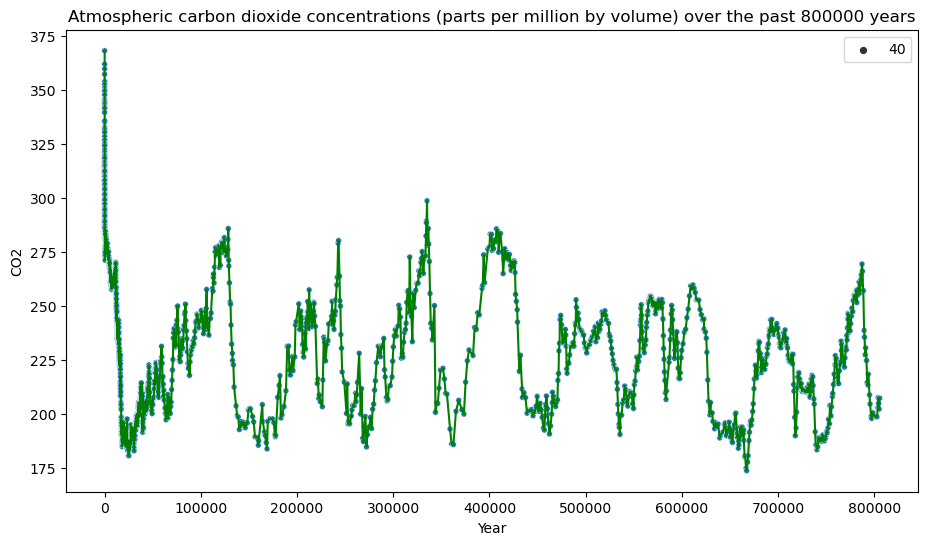

In [21]:
plt.figure(figsize= (11,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years')

sns.scatterplot(x='Year', y='CO2', data=df_co2_ipcc, size = 40)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x = 'Year', y = 'CO2', data = df_co2_ipcc, color = 'green')

<Axes: title={'center': 'Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years'}, xlabel='Year', ylabel='CO2'>

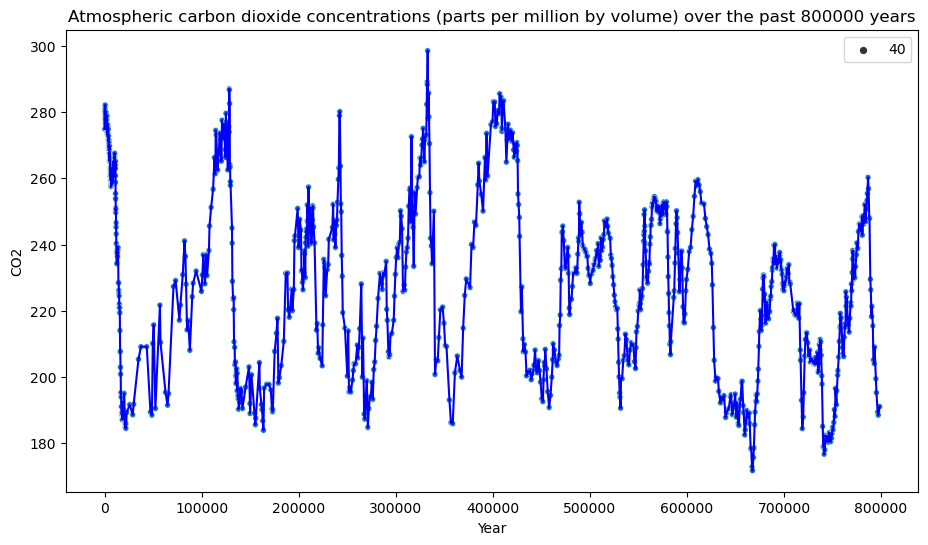

In [20]:
plt.figure(figsize= (11,6))
plt.title('Atmospheric carbon dioxide concentrations (parts per million by volume) over the past 800000 years')

sns.scatterplot(x='Year', y='CO2', data=df_co2_nature, size = 40)      # use 'size' parameter to decrease size of markers 

sns.lineplot(x = 'Year', y = 'CO2', data = df_co2_nature, color = 'blue')


### CO2 versus Temperature Anomoly ###

### CH4 versus Temperature Anomoly ###

### Climate change signals in the Irish context ###

### Fusion of datasets ###

### Prediction of Global Temperature Anomoly ###

### Accelerating increases of temperature ###

### Summary ###

### References ###